In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score
from sklearn.svm import SVC
import seaborn as sns

In [2]:
data = pd.read_csv(r"E:\DATA-SCIENCE\Project\CODSOFT\archive (3)\spam.csv",encoding_errors='ignore')

In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will _ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


**Data Cleaning**

In [4]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)

In [5]:
data.columns

Index(['v1', 'v2'], dtype='object')

In [6]:
#data shape 
data.shape 

(5572, 2)

In [7]:
#Null values 
data.isna().sum()

v1    0
v2    0
dtype: int64

In [8]:
#Rename the columns name from v1,v2 to Category,Message 
data.rename(columns={'v1':'Category','v2':'Message'},inplace=True)

In [9]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will _ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
#Count the values paresent in column 
data['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

**Binary Encoding**

In [14]:
#ham encoded as 
data['Category'] = data['Category'].replace({'ham':1,'spam':0})

In [15]:
data

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will _ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [16]:
data['Category'].value_counts()

Category
1    4825
0     747
Name: count, dtype: int64

In [17]:
data.loc[:0]

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."


**Data Training and Testing**

In [18]:
X = data['Message']   #independent features 
y = data['Category']  #dependent or target features 

In [19]:
#split the data 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4457,), (1115,), (4457,), (1115,))

**Model for text data**
TfidfVectorizer library which is combination of Term Frequency and Inverse Document Frequency.
tf shows us how many time the term(word) are repeated in string, and idf that will count the weight(importance) of that word from document.

In [21]:
tf = TfidfVectorizer(min_df=1,analyzer='word',stop_words='english',lowercase=True)

In [22]:
#fit-transform the train data 
X_train_vector = tf.fit_transform(X_train)

In [23]:
#transform the test data 
X_test_vector = tf.transform(X_test) 
#Always use transform for better reliability with train data 

In [24]:
print(X_train_vector)

  (0, 4508)	0.4658046386365619
  (0, 3204)	0.348722265231364
  (0, 7401)	0.348722265231364
  (0, 1704)	0.3431839629173582
  (0, 4403)	0.4528381701109944
  (0, 1371)	0.4658046386365619
  (1, 0)	0.2654936554684193
  (1, 1647)	0.3059746053542906
  (1, 6427)	0.2953742837684993
  (1, 4521)	0.3059746053542906
  (1, 418)	0.28715203556385105
  (1, 4279)	0.2953742837684993
  (1, 4994)	0.1937920260229529
  (1, 2656)	0.3059746053542906
  (1, 1533)	0.2015782058421696
  (1, 6283)	0.269833648032668
  (1, 3624)	0.2804339696184593
  (1, 3134)	0.3059746053542906
  (1, 1186)	0.26161139982801973
  (2, 2188)	0.5102109014477275
  (2, 5339)	0.5102109014477275
  (2, 1672)	0.35156722029872034
  (2, 5757)	0.3962151014046925
  (2, 3055)	0.44585171875646595
  (3, 5472)	0.4829129976175997
  :	:
  (4451, 5727)	0.3358090891373877
  (4451, 4674)	0.3478605253385091
  (4452, 3395)	0.4536077050510107
  (4452, 3416)	0.4833413012939851
  (4452, 1578)	0.3576443319642905
  (4452, 1779)	0.3311324953642251
  (4452, 5986)	0.3

Explain : In the context of text analysis and TF-IDF, this could represent the TF-IDF score for a particular term (word) in a document. The row index (0) could correspond to the document, the column index (4508) could correspond to the specific term in the vocabulary, and the value (0.4658046386365619) represents the TF-IDF score for that term in the document.

In [25]:
#for example if we want to check whats inside the term of 4508 at 0 index 
feature_name = tf.get_feature_names_out()
term_4508 = feature_name[4508]
print(f"Here the term is:{term_4508}")

Here the term is:naked


In [90]:
#if we want to check whole term than 
for index,term in enumerate(feature_name):
    print(f"{index} : {term}")

0 : 00
1 : 000
2 : 000pes
3 : 008704050406
4 : 0089
5 : 0121
6 : 01223585236
7 : 0125698789
8 : 02
9 : 0207
10 : 02072069400
11 : 02073162414
12 : 02085076972
13 : 021
14 : 03
15 : 04
16 : 0430
17 : 05
18 : 050703
19 : 0578
20 : 06
21 : 07
22 : 07046744435
23 : 07090201529
24 : 07090298926
25 : 07099833605
26 : 07123456789
27 : 0721072
28 : 07732584351
29 : 07734396839
30 : 07742676969
31 : 07753741225
32 : 0776xxxxxxx
33 : 07781482378
34 : 07786200117
35 : 077xxx
36 : 07801543489
37 : 07808
38 : 07808247860
39 : 07808726822
40 : 07821230901
41 : 07880867867
42 : 0789xxxxxxx
43 : 07946746291
44 : 0796xxxxxx
45 : 07973788240
46 : 07xxxxxxxxx
47 : 0800
48 : 08000407165
49 : 08000776320
50 : 08000839402
51 : 08000930705
52 : 08000938767
53 : 08001950382
54 : 08002888812
55 : 08002986030
56 : 08002986906
57 : 08006344447
58 : 0808
59 : 08081263000
60 : 08081560665
61 : 0825
62 : 083
63 : 0844
64 : 08448350055
65 : 08448714184
66 : 0845
67 : 08450542832
68 : 08452810071
69 : 08452810073
70 

# Model for Classification

In [26]:
model = LogisticRegression().fit(X_train_vector,y_train)

In [27]:
#Accuracy on train data 
pred_train_data = model.predict(X_train_vector)
accuracy_on_train = accuracy_score(y_train,pred_train_data)*100
print("Accuracy on Train data = {:.2f}%".format(accuracy_on_train))

Accuracy on Train data = 96.95%


In [28]:
#Accuracy on test data 
pred_test_data = model.predict(X_test_vector)
accuracy_on_test = accuracy_score(y_test,pred_test_data)*100
print("Accuracy on Test data = {:.2f}%".format(accuracy_on_test))

Accuracy on Test data = 95.25%


In [29]:
#Confusion matrix
cm_lr = confusion_matrix(y_test,pred_test_data)
print(cm_lr)
print("="*20)
precision_lr = precision_score(y_test,pred_test_data)*100
print("Precision Score:{:.2f}%".format(precision_lr))
recall_lr = recall_score(y_test,pred_test_data)*100
print("Recall or sensitivity Score:{:.2f}%".format(recall_lr))

[[100  50]
 [  3 962]]
Precision Score:95.06%
Recall or sensitivity Score:99.69%


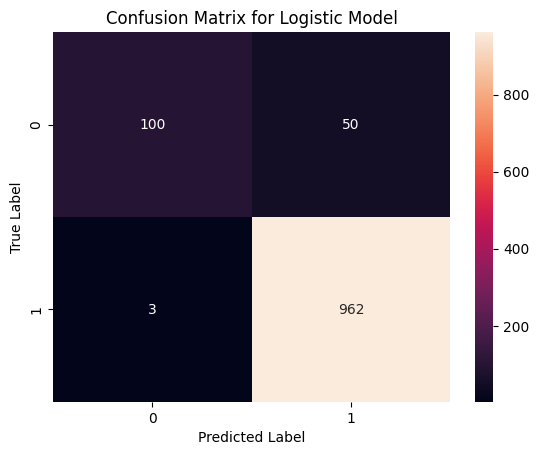

In [64]:
sns.heatmap(cm_lr,annot=True,fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Model')
plt.show()

In [30]:
#Classification Report  
cf_lr = classification_report(y_test,pred_test_data)
print(cf_lr)

              precision    recall  f1-score   support

           0       0.97      0.67      0.79       150
           1       0.95      1.00      0.97       965

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



**Prediction on Unseen data : [LOGISTIC MODEL]**

In [106]:
user_input = ["Congratulations! You have all been selected to receive a free gift card worth $1000 \
                  Click on this link [Link] to claim your reward now. Limited time offer, \
                  so act fast! Don't miss out on this amazing opportunity."]
input_data = tf.transform(user_input)        #transform the user data(test data)
pred_user_data = model.predict(input_data)

if (pred_user_data[0] == 0):
    print("This SMS is SPAM")
else:
    print("This SMS is HAM")

This SMS is SPAM


In [41]:
#Let made model with SVM : kernal = linear 
model_svm_linear = SVC(kernel='linear',C=1.0,gamma=0.5)

In [42]:
model_svm_linear.fit(X_train_vector,y_train)

SVC(gamma=0.5, kernel='linear')

In [43]:
pred_svm_linear = model_svm_linear.predict(X_train_vector)
accuracy_on_svm_train = accuracy_score(y_train,pred_svm_linear)*100
print("Accuracy on Train data = {:.2f}%".format(accuracy_on_svm_train))

Accuracy on Train data = 99.73%


In [44]:
#Accuracy on test data 
pred_test_linear_svm = model_svm_linear.predict(X_test_vector)
accuracy_on_svm = accuracy_score(y_test,pred_test_linear_svm)*100
print("Accuracy on Test data = {:.2f}%".format(accuracy_on_svm))

Accuracy on Test data = 97.94%


In [45]:
#Let made model with SVM : kernal = poly
model_svm_poly = SVC(kernel='poly',C=1.0,gamma=0.5)
model_svm_poly.fit(X_train_vector,y_train)

SVC(gamma=0.5, kernel='poly')

In [46]:
pred_on_poly_svm = model_svm_poly.predict(X_train_vector)
accuracy_on_poly_svm = accuracy_score(y_train,pred_on_poly_svm)*100
print("Accuracy on Train data = {:.2f}%".format(accuracy_on_poly_svm))

Accuracy on Train data = 86.61%


In [53]:
#Accuracy on test data 
pred_test_poly_svm = model_svm_poly.predict(X_test_vector)
accuracy_on_svm_poly = accuracy_score(y_test,pred_test_poly_svm)*100
print("Accuracy on Test data = {:.2f}%".format(accuracy_on_svm_poly))

Accuracy on Test data = 86.55%


In [54]:
#We go through the SVM : linear kernal 
cm_svm = confusion_matrix(y_test,pred_test_linear_svm) 
print(cm_svm)

[[131  19]
 [  4 961]]


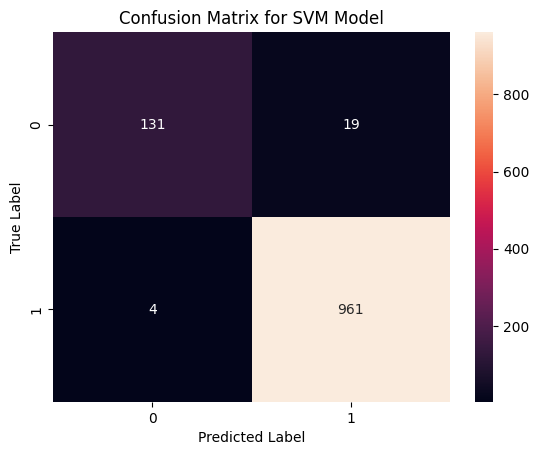

In [63]:
sns.heatmap(cm_svm,annot=True,fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Model')
plt.show()

In [68]:
cf_svm = classification_report(y_test,pred_test_linear_svm)

In [76]:
print("Classification Report on SVM MODEL".center(50))
print(cf_svm)

        Classification Report on SVM MODEL        
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       150
           1       0.98      1.00      0.99       965

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [102]:
#prediction on new data or unseen with SVM MODEL 
user_input_svm = ["Congratulations! You have all been selected to receive a free gift card worth $1000 \
                  Click on this link [Link] to claim your reward now. Limited time offer, \
                  so act fast! Don't miss out on this amazing opportunity."]
input_data_svm = tf.transform(user_input_svm)        #transform the user data(test data)
pred_user_data_svm = model_svm_linear.predict(input_data_svm)

if (pred_user_data_svm[0] == 0):
    print("This SMS is SPAM")
else:
    print("This SMS is HAM")

This SMS is SPAM


In [90]:
#Let create user define function 
def model_evaluation(X_train_vector,X_test_vector,y_train,y_test):
    #For logistic regression
    lr = LogisticRegression().fit(X_train_vector,y_train)
    #For SVM model
    svm = SVC(kernel='linear',gamma=0.5,C=1.0).fit(X_train_vector,y_train)
    pred_lr = lr.predict(X_test_vector)
    accuracy_lr = accuracy_score(y_test,pred_lr)*100
    pred_svm = svm.predict(X_test_vector)
    accuracy_svm = accuracy_score(y_test,pred_svm)*100
    cm_lr = confusion_matrix(y_test,pred_lr)
    cm_svm = confusion_matrix(y_test,pred_svm)
    return accuracy_lr,accuracy_svm,cm_lr,cm_svm

accuracy_lr,accuracy_svm,cm_lr,cm_svm = model_evaluation(X_train_vector,X_test_vector,y_train,y_test)

print("Accuracy Score Logistic : {:.2f}".format(accuracy_lr))
print("Accuracy Score SVM : {:.2f}".format(accuracy_svm))
print("*"*100)
print("CONFUSION MATRIX ON LOGISTIC REGRESSION")
print(cm_lr)
print("="*100)
print("CONFUSION MATRIX ON SVM")
print(cm_svm)

Accuracy Score Logistic : 95.25
Accuracy Score SVM : 97.94
****************************************************************************************************
CONFUSION MATRIX ON LOGISTIC REGRESSION
[[100  50]
 [  3 962]]
CONFUSION MATRIX ON SVM
[[131  19]
 [  4 961]]


In [105]:
#Let made a program where a user can enter the string to check the message is SPAM OR HAM(not spam)
#model : SVM
while True:
    use_input = input("Enter the string for checkig the message if it is SPAM OR HAM")
    user_input_svm = [use_input]
    input_data_svm = tf.transform(user_input)        #transform the user data(test data)
    pred_user_data_svm = model_svm_linear.predict(input_data_svm)
    print("*"*20)
    if (pred_user_data_svm[0] == 0):
        print("This SMS is SPAM")
    else:
        print("This SMS is HAM")
    print("="*100)
    checking = input("Do you wants to check another string ? Enter the choice : (yes/no):").strip().lower()
    #if checking != 
    if checking == 'no':
        print("Good bye")
        break
    elif checking == 'yes':
        continue
    else:
        print("enter proper choice")

Enter the string for checkig the message if it is SPAM OR HAMCongratulations! You have all been selected to receive a free gift card worth $1000 \                   Click on this link [Link] to claim your reward now. Limited time offer, \                   so act fast! Don't miss out on this amazing opportunity.
********************
This SMS is SPAM
Do you wants to check another string ? Enter the choice : (yes/no):no
Good bye


**Conclusion:** 
In this SMS spam detection project, we developed a robust system for identifying whether a given message is spam or not (ham). Using Logistic Regression and Support Vector Machine (SVM) models, we leveraged the power of machine learning to classify messages accurately.
Overall, this project highlights the practical utility of machine learning in automating the detection of spam, enhancing communication security, and improving user experience by filtering out unwanted messages. Future improvements could include expanding the dataset, exploring other machine learning algorithms, and refining the user interface for broader application.